# Data Exploration
We will first explore the better to have a better understanding of its contents. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Read in and append dataframes
df = pd.DataFrame()
for filename in os.listdir('datasets'):
     df = df.append(pd.read_csv('datasets/' + filename, dtype={'label':str}, na_values='Unspecified'), ignore_index=True)

df.head()

,index,label,quote,context,author,date,categories,staff
0,0,barely-true,“When large numbers of people in Butler (Pa.) ...,a Fox News broadcast,Tucker Carlson,"November 2, 2020","National, Drugs, Pundits, PunditFact",Jon Greenberg
1,1,barely-true,"Broken voting machines in Russellville, Ark., ...",a post on Facebook,Viral image,"October 21, 2020","Elections, Facebook Fact-checks",Bill McCarthy
2,2,barely-true,Pennsylvania officials are “attempting to sile...,a Facebook post,Facebook posts,"November 2, 2020","Elections, Facebook Fact-checks, Coronavirus",Ciara O'Rourke
3,3,barely-true,"In Massachusetts, ""anybody can go vote for any...",a video posted on TikTok,TikTok posts,"September 1, 2020","Elections, Voter ID Laws",Miriam Valverde
4,4,barely-true,“Joe Biden and Kamala Harris’ government-run h...,a TV ad,Donald Trump,"October 28, 2020","National, Health Care",Amy Sherman


## Data Cleaning and Processing

In [3]:
# Format date variable and extract information
df['date_formatted'] = pd.to_datetime(df['date'], format='%B %d, %Y')
df['year'] = df['date_formatted'].dt.year.astype('Int64')

## Counts by Year

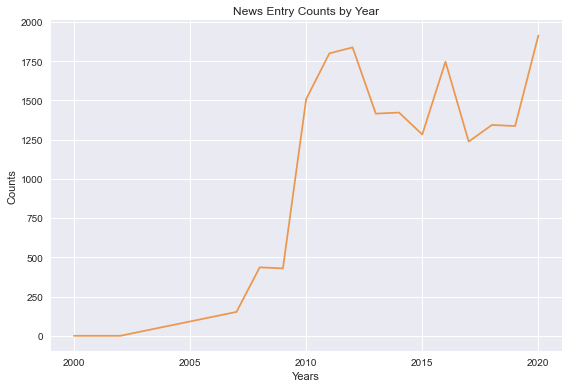

In [4]:
# Plot counts by year
df['year'].value_counts().sort_index().plot(kind='line', xticks=np.arange(2000, 2021, 5), color='#eb974e')
plt.title('News Entry Counts by Year')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.tight_layout()

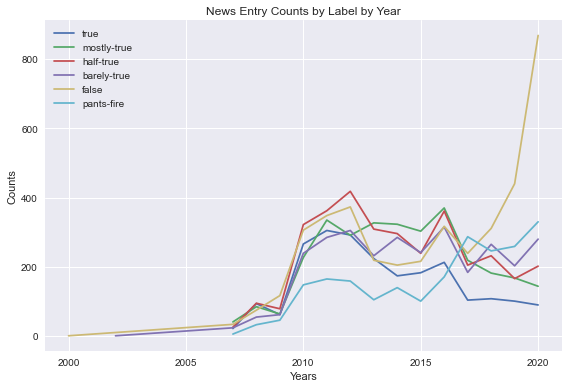

In [5]:
# Plot counts by label by year
r = np.arange(2000, 2021, 5)
df.loc[df['label']=='true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='true')
df.loc[df['label']=='mostly-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='mostly-true')
df.loc[df['label']=='half-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='half-true')
df.loc[df['label']=='barely-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='barely-true')
df.loc[df['label']=='false', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='false')
df.loc[df['label']=='pants-fire', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='pants-fire')
plt.title('News Entry Counts by Label by Year')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()

## Counts by Label
**Note:** We observe that there are more `false` news than `true`, which should be taken into consideration during our analyses.

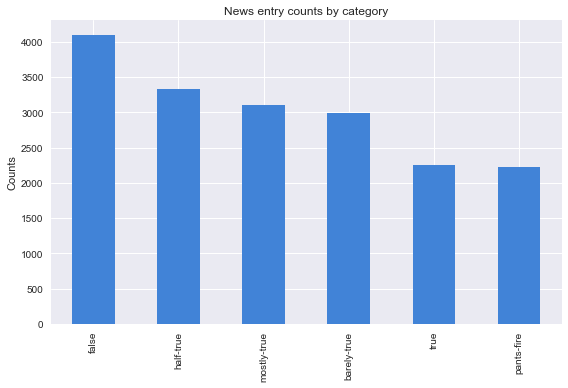

In [6]:
df['label'].value_counts().plot(kind='bar', color='#4183d7')
plt.title('News entry counts by category')
plt.ylabel('Counts')
plt.tight_layout()

## Counts by Author
Top 15 most frequent authors.

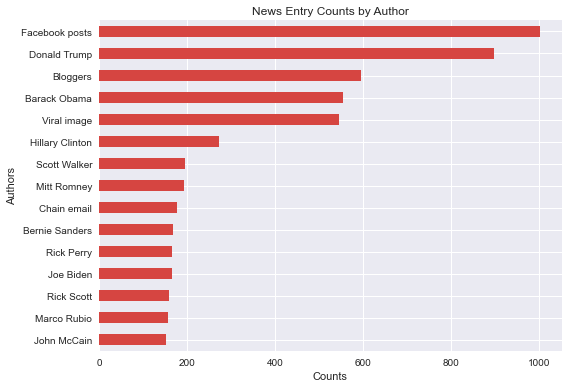

In [7]:
df['author'].value_counts()[:15][::-1].plot.barh(color='#d64541')
plt.title('News Entry Counts by Author')
plt.xlabel('Counts')
plt.ylabel('Authors')
plt.tight_layout()

## Counts by Context
Top 15 most frequent contexts.

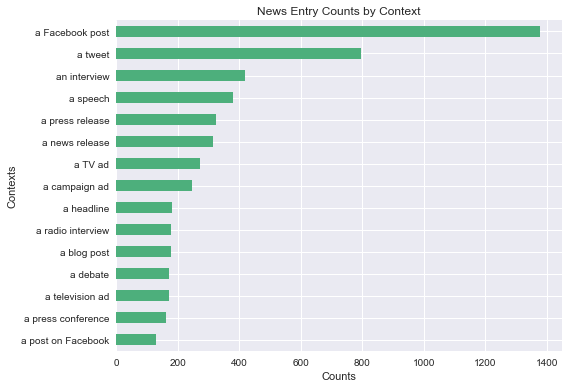

In [8]:
df['context'].value_counts()[:15][::-1].plot.barh(color='#4daf7c')
plt.title('News Entry Counts by Context')
plt.xlabel('Counts')
plt.ylabel('Contexts')
plt.tight_layout()

## Counts by Categories
Top 15 most frequent categories.

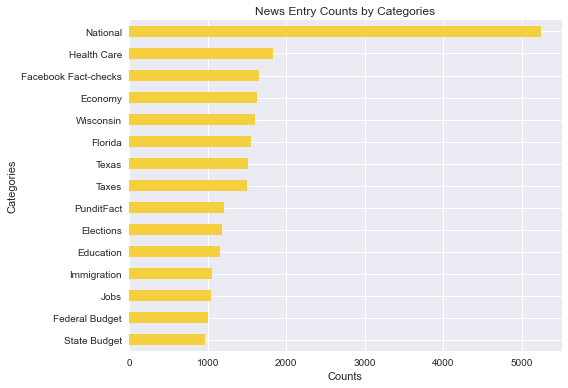

In [9]:
df['categories'].str.split(pat=', ', expand=True).stack().value_counts()[:15][::-1].plot.barh(color='#f4d03f')
plt.title('News Entry Counts by Categories')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.tight_layout()

## WordCloud

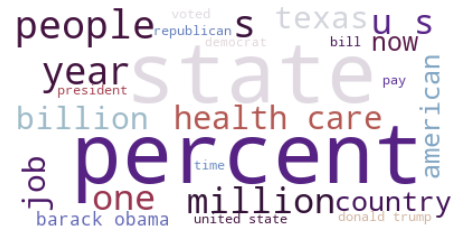

In [10]:
# Concatenate quotes
quotes = " ".join(quote.lower() for quote in df['quote'])

# Set stopwords
stopwords = set(STOPWORDS)
stopwords.add('says')
stopwords.add('said')
stopwords.add('will')

# Generate word cloud
wordcloud = WordCloud(max_font_size=75, max_words=25, stopwords=stopwords, background_color="white", colormap='twilight').generate(quotes)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()